Project Analysis

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('seaborn-v0_8-whitegrid')


In [119]:
# Load the dataset
df = pd.read_excel('data1.xlsx')  # Replace 'your_file.xlsx' with the actual file name

NOTE to self: 

family = categorical variable: scale 1 = yes, scale 2 = no

years_of_service = numerical variable: years

sat_variables: scale 1 - 5, 1 = very unsatisfied, 5 = very satisfied

In [120]:
df.head()

,index,family,years of service,management,colleagues,working environment,salary sat,work roles
0,1,1,22.0,3,3.0,3,3,3
1,2,2,10.0,1,5.0,2,1,3
2,3,1,7.0,3,4.0,1,1,3
3,4,2,14.0,3,3.0,3,3,3
4,5,1,4.0,2,3.0,2,1,2


In [121]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                82 non-null     int64  
 1   family               82 non-null     int64  
 2   years of service     80 non-null     float64
 3   management           82 non-null     int64  
 4   colleagues           81 non-null     float64
 5   working environment  82 non-null     int64  
 6   salary sat           82 non-null     int64  
 7   work roles           82 non-null     int64  
dtypes: float64(2), int64(6)
memory usage: 5.3 KB


In [122]:
df.isnull().sum()

index                  0
family                 0
years of service       2
management             0
colleagues             1
working environment    0
salary sat             0
work roles             0
dtype: int64

In [123]:
df.columns = ['id', 'family', 'years_of_service', 'sat_management', 'sat_colleagues', 'sat_work_env', 'sat_salary', 'sat_work_role']

In [124]:
df=df.drop(['id'], axis=1)
df.head()

,family,years_of_service,sat_management,sat_colleagues,sat_work_env,sat_salary,sat_work_role
0,1,22.0,3,3.0,3,3,3
1,2,10.0,1,5.0,2,1,3
2,1,7.0,3,4.0,1,1,3
3,2,14.0,3,3.0,3,3,3
4,1,4.0,2,3.0,2,1,2


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   family            82 non-null     int64  
 1   years_of_service  80 non-null     float64
 2   sat_management    82 non-null     int64  
 3   sat_colleagues    81 non-null     float64
 4   sat_work_env      82 non-null     int64  
 5   sat_salary        82 non-null     int64  
 6   sat_work_role     82 non-null     int64  
dtypes: float64(2), int64(5)
memory usage: 4.6 KB


In [126]:
df.describe()

,family,years_of_service,sat_management,sat_colleagues,sat_work_env,sat_salary,sat_work_role
count,82.000000,80.000000,82.000000,81.000000,82.000000,82.000000,82.000000
mean,1.621951,12.175000,3.060976,4.061728,3.219512,2.109756,3.195122
std,0.487884,8.807038,1.058155,0.826826,1.154961,1.111179,1.047502
min,1.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000
25%,1.000000,3.750000,2.000000,4.000000,3.000000,1.000000,3.000000
50%,2.000000,12.500000,3.000000,4.000000,3.000000,2.000000,3.000000
75%,2.000000,18.250000,4.000000,5.000000,4.000000,3.000000,4.000000
max,2.000000,36.000000,5.000000,5.000000,5.000000,5.000000,5.000000


 BACKGROUND VARIABLES: 

 Family (Categorical Variable)
 
 Description: This variable indicates whether an employee is part of a family (1 = Yes, 2 = No)

Frequency Distribution: Count how many employees are part of a family vs. not.



In [127]:
df['family'].value_counts()


family
2    51
1    31
Name: count, dtype: int64

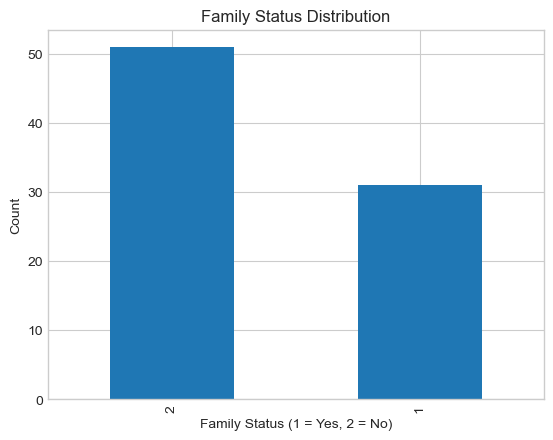

In [128]:
df['family'].value_counts().plot(kind='bar', title='Family Status Distribution')
plt.xlabel('Family Status (1 = Yes, 2 = No)')
plt.ylabel('Count')
plt.show()

Compare average satisfaction scores (sat_management) between employees who are part of a family and those who are not.

In [ ]:
df.groupby('family')['sat_management'].mean().plot(kind='bar')
plt.title('Average Satisfaction with Management by Family Status')
plt.xlabel('Family Status (1 = Yes, 2 = No)')
plt.ylabel('Average Satisfaction Score')
plt.show()

Compare average satisfaction scores (sat_colleagues) between employees who are part of a family and those who are not.

In [ ]:
df.groupby('family')['sat_colleagues'].mean().plot(kind='bar')
plt.title('Average Satisfaction with Colleagues by Family Status')
plt.xlabel('Family Status (1 = Yes, 2 = No)')
plt.ylabel('Average Satisfaction Score')
plt.show()



Years of Service (Numerical Variable)

Description: This variable represents the number of years an employee has worked at the company.

In [ ]:
df['years_of_service'].describe()


Distribution: Visualize the distribution of years of service using a histogram or box plot.



In [ ]:
plt.hist(df['years_of_service'], bins=10)
plt.title('Distribution of Years of Service')
plt.xlabel('Years of Service')
plt.ylabel('Frequency')
plt.show()

Check if there’s a relationship between years of service and satisfaction scores (e.g., do employees with more years of service tend to be more satisfied?)

In [ ]:
plt.scatter(df['years_of_service'], df['sat_management'])
plt.title('Years of Service vs. Satisfaction with Management')
plt.xlabel('Years of Service')
plt.ylabel('Satisfaction with Management')
plt.show()

Satisfaction Variables (Numerical Variables, Scale 1–5)

Description: These variables measure employee satisfaction in different areas (management, colleagues, work environment, salary, and work role).

Possible Analyses:

Summary Statistics: Calculate mean, median, and standard deviation for each satisfaction variable.

In [ ]:
satisfaction_columns = ['sat_management', 'sat_colleagues', 'sat_work_env', 'sat_salary', 'sat_work_role']
df[satisfaction_columns].describe()

In [ ]:
for col in satisfaction_columns:
    plt.hist(df[col], bins=5, range=(1, 6))
    plt.title(f'Distribution of {col}')
    plt.xlabel('Satisfaction Score')
    plt.ylabel('Frequency')
    plt.show()

Check if satisfaction in one area (e.g., management) is related to satisfaction in another area (e.g., salary).



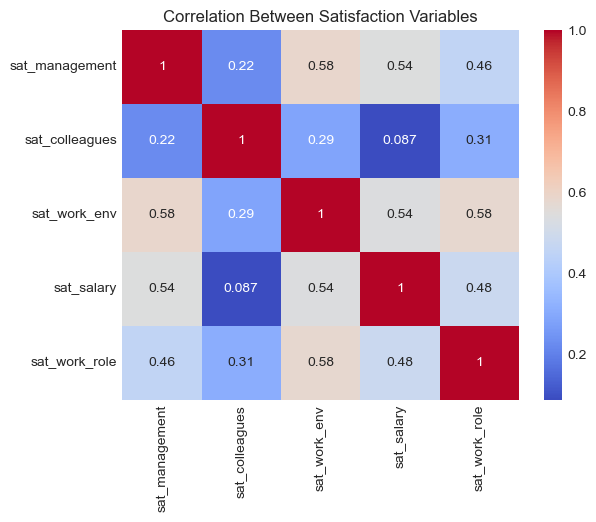

In [129]:
import seaborn as sns
sns.heatmap(df[satisfaction_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Satisfaction Variables')
plt.show()

Compare average satisfaction scores between employees who are part of a family and those who are not.



In [ ]:
for col in satisfaction_columns:
    df.groupby('family')[col].mean().plot(kind='bar')
    plt.title(f'Average {col} by Family Status')
    plt.xlabel('Family Status (1 = Yes, 2 = No)')
    plt.ylabel('Average Satisfaction Score')
    plt.show()

Group employees by years of service (e.g., 0–5 years, 5–10 years, etc.) and compare their average satisfaction scores.

In [ ]:
df['service_group'] = pd.cut(df['years_of_service'], bins=[0, 5, 10, 15, 20], labels=['0-5', '5-10', '10-15', '15-20'])
for col in satisfaction_columns:
    df.groupby('service_group', observed=False)[col].mean().plot(kind='bar')
    plt.title(f'Average {col} by Years of Service Group')
    plt.xlabel('Years of Service Group')
    plt.ylabel('Average Satisfaction Score')
    plt.show()

In [ ]:
df['service_group'] = pd.cut(df['years_of_service'], bins=[0, 5, 10, 15, 20], labels=['0-5', '5-10', '10-15', '15-20'])
for col in satisfaction_columns:
    df.groupby('service_group', observed=False)[col].mean().plot(kind='bar')
    plt.title(f'Average {col} by Years of Service Group')
    plt.xlabel('Years of Service Group')
    plt.ylabel('Average Satisfaction Score')
    plt.show()

Combined Analysis

Analyzing Dependency Between family and years_of_service

First, let’s calculate summary statistics for years_of_service grouped by family:



In [ ]:
df.groupby('family')['years_of_service'].describe()


A box plot is great for comparing the distribution of a numerical variable (years_of_service) across categories of a categorical variable (family).

In [ ]:
import seaborn as sns

sns.boxplot(x='family', y='years_of_service', data=df)
plt.title('Years of Service by Family Status')
plt.xlabel('Family Status (1 = Yes, 2 = No)')
plt.ylabel('Years of Service')
plt.show()

In [ ]:
sns.violinplot(x='family', y='years_of_service', data=df)
plt.title('Years of Service by Family Status')
plt.xlabel('Family Status (1 = Yes, 2 = No)')
plt.ylabel('Years of Service')
plt.show()

In [ ]:
df[df['family'] == 1]['years_of_service'].hist(bins=10, alpha=0.5, label='Family = Yes')
df[df['family'] == 2]['years_of_service'].hist(bins=10, alpha=0.5, label='Family = No')
plt.title('Years of Service by Family Status')
plt.xlabel('Years of Service')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Family Status and Years of Service:

Analyze how family status and years of service interact to affect satisfaction scores.

In [ ]:
df.groupby(['family', 'service_group'], observed=False)['sat_management'].mean().unstack().plot(kind='bar')
plt.title('Average Satisfaction with Management by Family Status and Years of Service Group')
plt.xlabel('Family Status (1 = Yes, 2 = No)')
plt.ylabel('Average Satisfaction Score')
plt.show()

Overall Satisfaction Trends:

Calculate an overall satisfaction score by averaging all sat_ variables and analyze trends based on family status and years of service.

In [ ]:
df['overall_satisfaction'] = df[satisfaction_columns].mean(axis=1)
df.groupby('family')['overall_satisfaction'].mean().plot(kind='bar')
plt.title('Overall Satisfaction by Family Status')
plt.xlabel('Family Status (1 = Yes, 2 = No)')
plt.ylabel('Average Overall Satisfaction Score')
plt.show()

Summary of Key Questions to Explore
Family Status:

Are employees with families more or less satisfied than those without families?

Years of Service:

Do employees with more years of service have higher or lower satisfaction?

Satisfaction Variables:

Which areas (management, colleagues, work environment, salary, work role) have the highest and lowest satisfaction scores?

Are there correlations between different satisfaction areas?

Combined Effects:

How do family status and years of service together influence satisfaction?